In [60]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X = pd.read_excel("breast_cancer_sans_diag.xlsx",sheet_name=0,header=0)

print(X.shape)

T = X.describe()  #on représente les statistiques descriptives
print(T)

(569, 31)
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.0

In [61]:
X_numeric = X.select_dtypes(include=['number'])

print(X_numeric.mean()) 
print(X_numeric.var())

id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


Visualisation comme sur l'exemple de : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

On visualise selon nos caractéristiques (mean, std, worst)

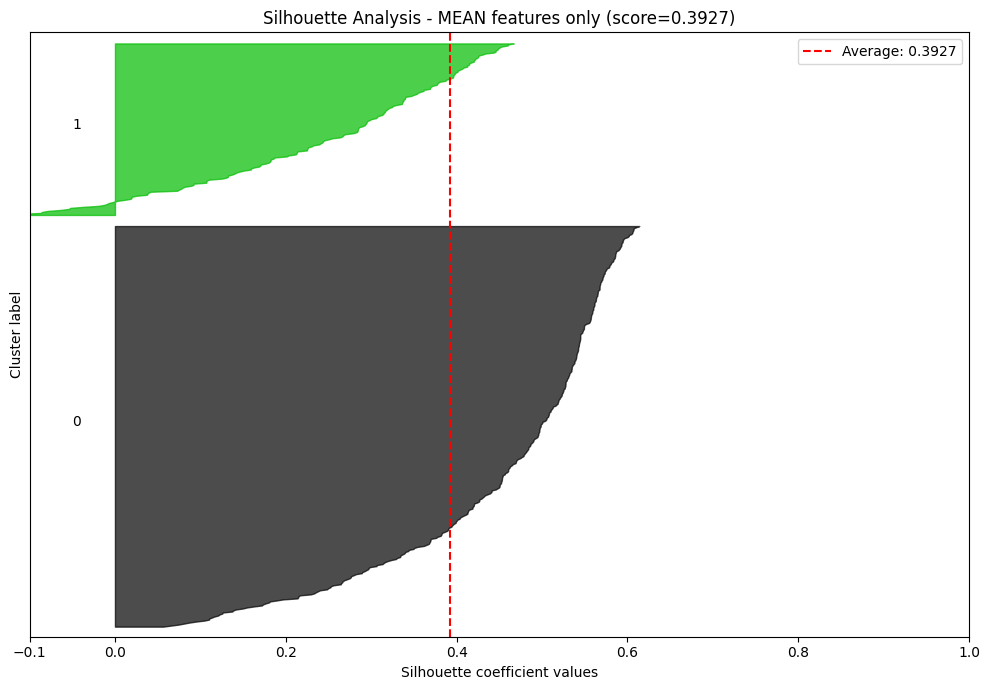

Silhouette score (MEAN features): 0.3927
Nombre de features: 10
Features utilisées: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']



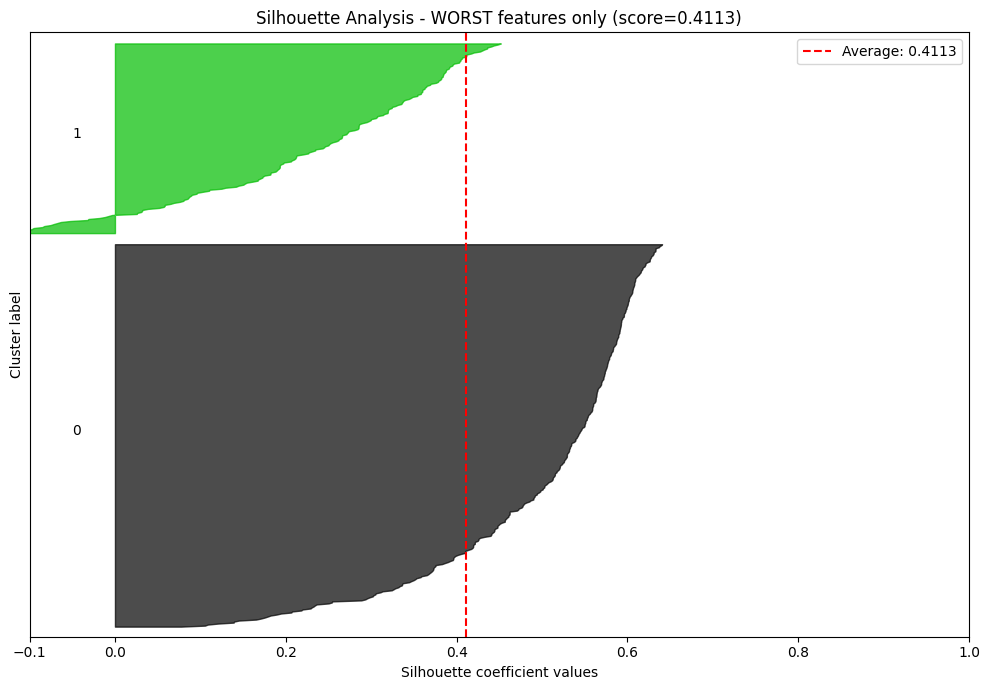

Silhouette score (WORST features): 0.4113
Nombre de features: 10
Features utilisées: ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']



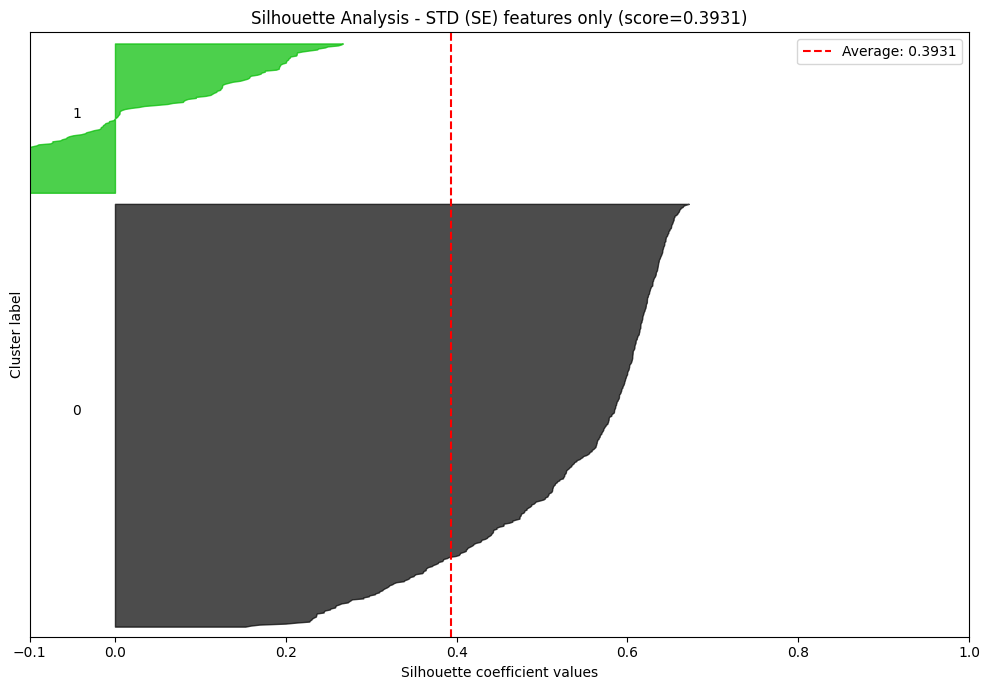

Silhouette score (STD features): 0.3931
Nombre de features: 10
Features utilisées: ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']



In [62]:

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Sélection des colonnes
mean_cols = [col for col in X_numeric.columns if 'mean' in col.lower()]
std_cols = [col for col in X_numeric.columns if 'se' in col.lower()]
worst_cols = [col for col in X_numeric.columns if 'worst' in col.lower()]


#mean uniquement
X_mean = X_numeric[mean_cols]
scaler_mean = StandardScaler()
X_mean_scaled = scaler_mean.fit_transform(X_mean)

clusterer_mean = KMeans(n_clusters=2, random_state=10)
labels_mean = clusterer_mean.fit_predict(X_mean_scaled)
silhouette_mean = silhouette_score(X_mean_scaled, labels_mean)
sample_silhouette_mean = silhouette_samples(X_mean_scaled, labels_mean)

fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_mean_scaled) + 30])

y_lower = 10
for i in range(2):
    ith_cluster = sample_silhouette_mean[labels_mean == i]
    ith_cluster.sort()
    size_i = ith_cluster.shape[0]
    y_upper = y_lower + size_i
    
    color = cm.nipy_spectral(float(i) / 2)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10

ax1.set_title(f"Silhouette Analysis - MEAN features only (score={silhouette_mean:.4f})")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_mean, color="red", linestyle="--", label=f"Average: {silhouette_mean:.4f}")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.legend()
plt.tight_layout()
plt.show()

print(f"Silhouette score (MEAN features): {silhouette_mean:.4f}")
print(f"Nombre de features: {len(mean_cols)}")
print(f"Features utilisées: {mean_cols}\n")

# worst uniquement
X_worst = X_numeric[worst_cols]
scaler_worst = StandardScaler()
X_worst_scaled = scaler_worst.fit_transform(X_worst)

clusterer_worst = KMeans(n_clusters=2, random_state=10)
labels_worst = clusterer_worst.fit_predict(X_worst_scaled)
silhouette_worst = silhouette_score(X_worst_scaled, labels_worst)
sample_silhouette_worst = silhouette_samples(X_worst_scaled, labels_worst)

fig2, ax2 = plt.subplots(figsize=(10, 7))
ax2.set_xlim([-0.1, 1])
ax2.set_ylim([0, len(X_worst_scaled) + 30])

y_lower = 10
for i in range(2):
    ith_cluster = sample_silhouette_worst[labels_worst == i]
    ith_cluster.sort()
    size_i = ith_cluster.shape[0]
    y_upper = y_lower + size_i
    
    color = cm.nipy_spectral(float(i) / 2)
    ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax2.text(-0.05, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10

ax2.set_title(f"Silhouette Analysis - WORST features only (score={silhouette_worst:.4f})")
ax2.set_xlabel("Silhouette coefficient values")
ax2.set_ylabel("Cluster label")
ax2.axvline(x=silhouette_worst, color="red", linestyle="--", label=f"Average: {silhouette_worst:.4f}")
ax2.set_yticks([])
ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.legend()
plt.tight_layout()
plt.show()

print(f"Silhouette score (WORST features): {silhouette_worst:.4f}")
print(f"Nombre de features: {len(worst_cols)}")
print(f"Features utilisées: {worst_cols}\n")

#std uniquement
X_std = X_numeric[std_cols]
scaler_std = StandardScaler()
X_std_scaled = scaler_std.fit_transform(X_std)

clusterer_std = KMeans(n_clusters=2, random_state=10)
labels_std = clusterer_std.fit_predict(X_std_scaled)
silhouette_std = silhouette_score(X_std_scaled, labels_std)
sample_silhouette_std = silhouette_samples(X_std_scaled, labels_std)

fig3, ax3 = plt.subplots(figsize=(10, 7))
ax3.set_xlim([-0.1, 1])
ax3.set_ylim([0, len(X_std_scaled) + 30])

y_lower = 10
for i in range(2):
    ith_cluster = sample_silhouette_std[labels_std == i]
    ith_cluster.sort()
    size_i = ith_cluster.shape[0]
    y_upper = y_lower + size_i
    
    color = cm.nipy_spectral(float(i) / 2)
    ax3.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax3.text(-0.05, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10

ax3.set_title(f"Silhouette Analysis - STD (SE) features only (score={silhouette_std:.4f})")
ax3.set_xlabel("Silhouette coefficient values")
ax3.set_ylabel("Cluster label")
ax3.axvline(x=silhouette_std, color="red", linestyle="--", label=f"Average: {silhouette_std:.4f}")
ax3.set_yticks([])
ax3.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax3.legend()
plt.tight_layout()
plt.show()

print(f"Silhouette score (STD features): {silhouette_std:.4f}")
print(f"Nombre de features: {len(std_cols)}")
print(f"Features utilisées: {std_cols}\n")


On remarque que Worst est le calcul le plus utile pour séparer au mieux les clusters

In [63]:
X_worst = X_numeric[worst_cols]
scaler_worst = StandardScaler()
X_worst_scaled = scaler_worst.fit_transform(X_worst)

# Entraîner le modèle une fois
clusterer_worst = KMeans(n_clusters=2, random_state=10)
labels_worst = clusterer_worst.fit_predict(X_worst_scaled)

# Récupérer les centres des clusters
centers = clusterer_worst.cluster_centers_

# Fonction pour prédire manuellement la classe d'un nouvel exemple
def predict_center(new_example, centers):

    distances = np.sqrt(((new_example - centers)**2).sum(axis=1))
    return np.argmin(distances)  # Retourne l'indice du centre le plus proche

# Exemple d'utilisation pour tous les exemples
predicted_labels = []
for i in range(len(X_worst_scaled)):        # parcours les 10 features de worst, puis les compare aux centres
    label = predict_center(X_worst_scaled[i], centers)
    predicted_labels.append(label)

predicted_labels = np.array(predicted_labels)

# Vérification
print(f"Correspondance avec labels originaux: {(predicted_labels == labels_worst).sum() / len(labels_worst) * 100:.2f}%")

Correspondance avec labels originaux: 100.00%


In [64]:
# Voir les caractéristiques moyennes de chaque cluster
for i in range(2):
    print(f"\n Cluster {i} (Worst features)")
    cluster_data = X_worst[labels_worst == i]
    print(f"Nombre de patients: {len(cluster_data)}")
    print("\nCaractéristiques moyennes:")
    print(cluster_data.mean())


 Cluster 0 (Worst features)
Nombre de patients: 380

Caractéristiques moyennes:
radius_worst                13.711497
texture_worst               23.794474
perimeter_worst             89.092368
area_worst                 591.825263
smoothness_worst             0.124770
compactness_worst            0.177715
concavity_worst              0.163275
concave points_worst         0.076601
symmetry_worst               0.268611
fractal_dimension_worst      0.078188
dtype: float64

 Cluster 1 (Worst features)
Nombre de patients: 189

Caractéristiques moyennes:
radius_worst                 21.411640
texture_worst                29.462646
perimeter_worst             143.791164
area_worst                 1461.154497
smoothness_worst              0.147647
compactness_worst             0.408175
concavity_worst               0.491167
concave points_worst          0.191019
symmetry_worst                0.333232
fractal_dimension_worst       0.095522
dtype: float64


In [65]:
# Pour les features Worst
print("Attribution des patients aux clusters (WORST features):")
print(f"Cluster 0: {np.sum(labels_worst == 0)} patients")
print(f"Cluster 1: {np.sum(labels_worst == 1)} patients")

# Créer un DataFrame avec les résultats
results_worst = pd.DataFrame({
    'patient_id': X['id'],  # Si vous avez une colonne ID
    'cluster': labels_worst
})

print("\nPremiers patients et leur cluster:")
print(results_worst.head(30))

# Pour sauvegarder les résultats
results_worst.to_csv('clustering_results_worst.csv', index=False)

# Ou ajouter directement au DataFrame original
X['cluster_mean'] = labels_mean
X['cluster_worst'] = labels_worst
X['cluster_std'] = labels_std

print("\nDataFrame avec les clusters:")
print(X[['id', 'cluster_mean', 'cluster_worst', 'cluster_std']].head(30))

Attribution des patients aux clusters (WORST features):
Cluster 0: 380 patients
Cluster 1: 189 patients

Premiers patients et leur cluster:
    patient_id  cluster
0       842302        1
1       842517        1
2     84300903        1
3     84348301        1
4     84358402        1
5       843786        1
6       844359        1
7     84458202        1
8       844981        1
9     84501001        1
10      845636        0
11    84610002        1
12      846226        1
13      846381        0
14    84667401        1
15    84799002        1
16      848406        1
17    84862001        1
18      849014        1
19     8510426        0
20     8510653        0
21     8510824        0
22     8511133        1
23      851509        1
24      852552        1
25      852631        1
26      852763        1
27      852781        1
28      852973        1
29      853201        0

DataFrame avec les clusters:
          id  cluster_mean  cluster_worst  cluster_std
0     842302             1     

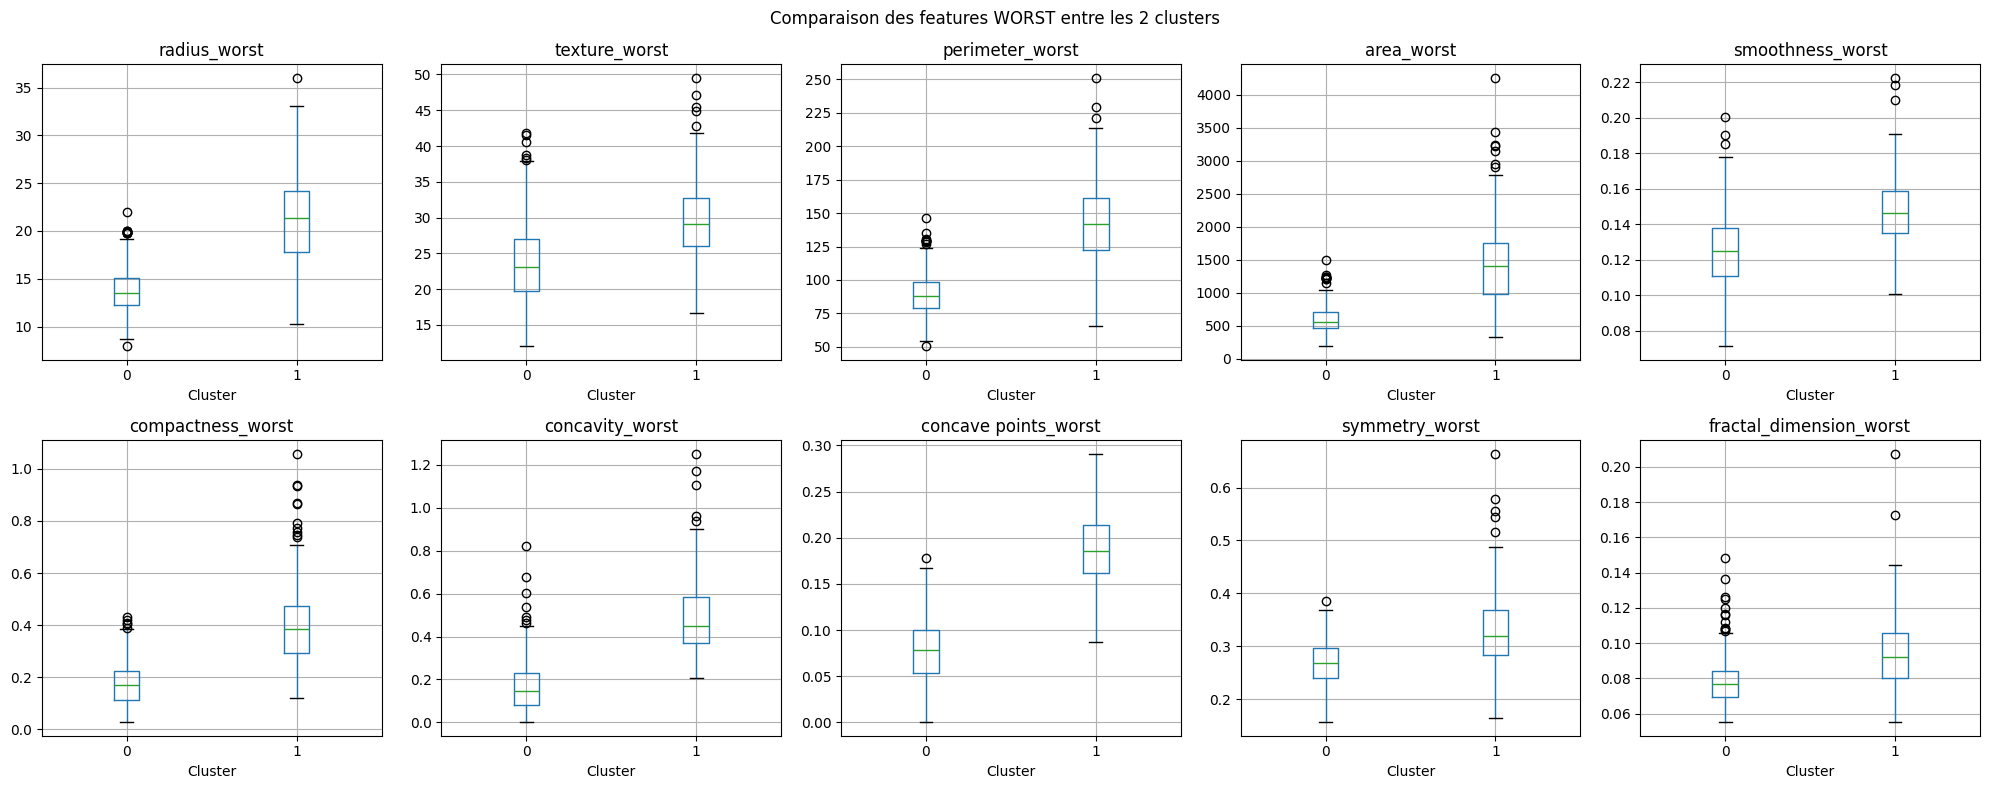

In [66]:
# Ajouter les labels au dataframe
X_worst_df = X_numeric[worst_cols].copy()
X_worst_df['Cluster'] = labels_worst

# Boxplot pour chaque feature
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(worst_cols):
    X_worst_df.boxplot(column=col, by='Cluster', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Cluster')

plt.suptitle('Comparaison des features WORST entre les 2 clusters')
plt.tight_layout()
plt.show()

Features qui ont l'air les plus discriminatrices :
- concaves points
- radius
- perimeter

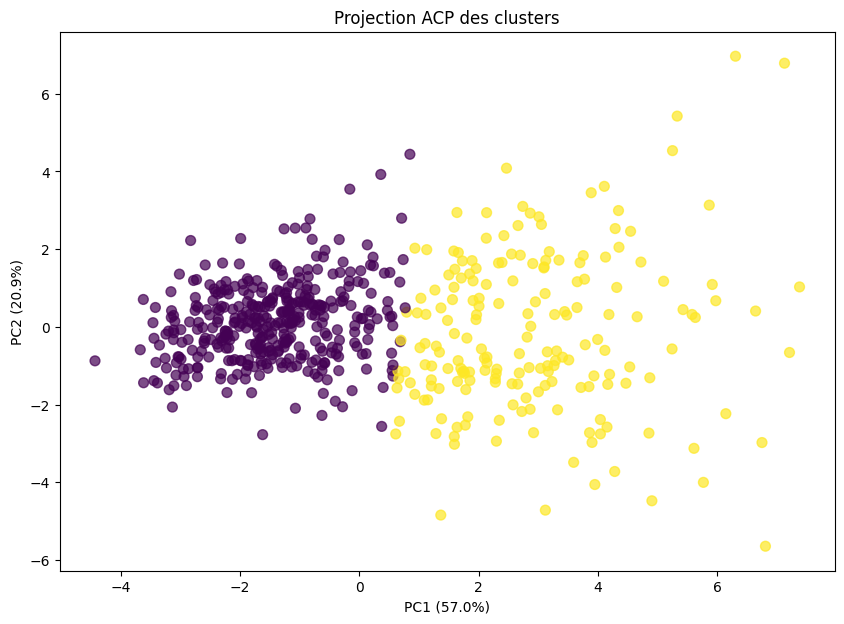

Contribution des features à PC1:
radius_worst: 0.336
texture_worst: 0.201
perimeter_worst: 0.348
area_worst: 0.325
smoothness_worst: 0.249
compactness_worst: 0.365
concavity_worst: 0.375
concave points_worst: 0.398
symmetry_worst: 0.250
fractal_dimension_worst: 0.254


In [72]:
# ACP sur les features worst
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_worst_scaled)

# Visualisation
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_worst, cmap='viridis', s=50, alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Projection ACP des clusters')
plt.show()

# Voir quelles features contribuent le plus à PC1 et PC2
print("Contribution des features à PC1:")
for i, col in enumerate(worst_cols):
    print(f"{col}: {pca.components_[0, i]:.3f}")

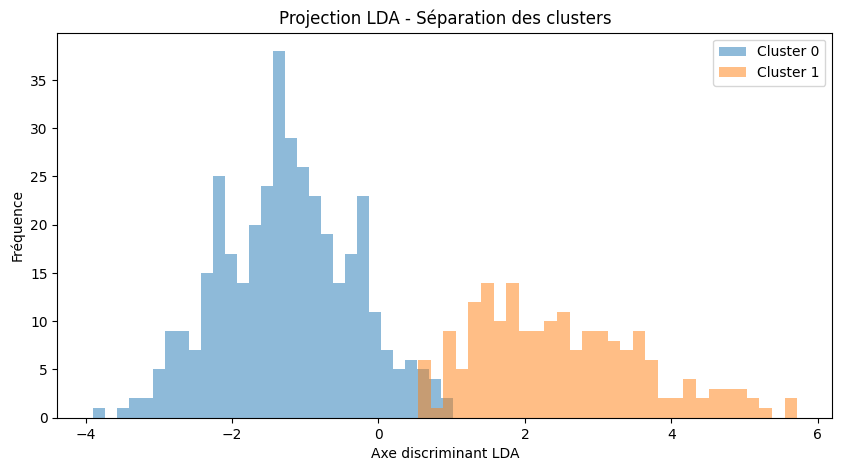


Coefficients LDA (importance pour la discrimination):
                   Feature  Coefficient
0             radius_worst     6.003165
3               area_worst    -2.361327
6          concavity_worst     1.530888
9  fractal_dimension_worst     1.490061
7     concave points_worst     1.091790
8           symmetry_worst     1.023201
5        compactness_worst    -0.953764
1            texture_worst     0.850066
2          perimeter_worst     0.781746
4         smoothness_worst     0.681645


In [ ]:
# LDA pour trouver l'axe qui sépare le mieux les 2 clusters
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_worst_scaled, labels_worst)

# Projection sur l'axe discriminant
plt.figure(figsize=(10, 5))
for i in range(2):
    plt.hist(X_lda[labels_worst == i], bins=30, alpha=0.5, label=f'Cluster {i}')
plt.xlabel('Axe discriminant LDA')
plt.ylabel('Fréquence')
plt.title('Projection LDA - Séparation des clusters')
plt.legend()
plt.show()

# Coefficients LDA (importance des features)
print("\nCoefficients LDA :")
lda_coefs = pd.DataFrame({
    'Feature': worst_cols,
    'Coefficient': lda.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(lda_coefs)

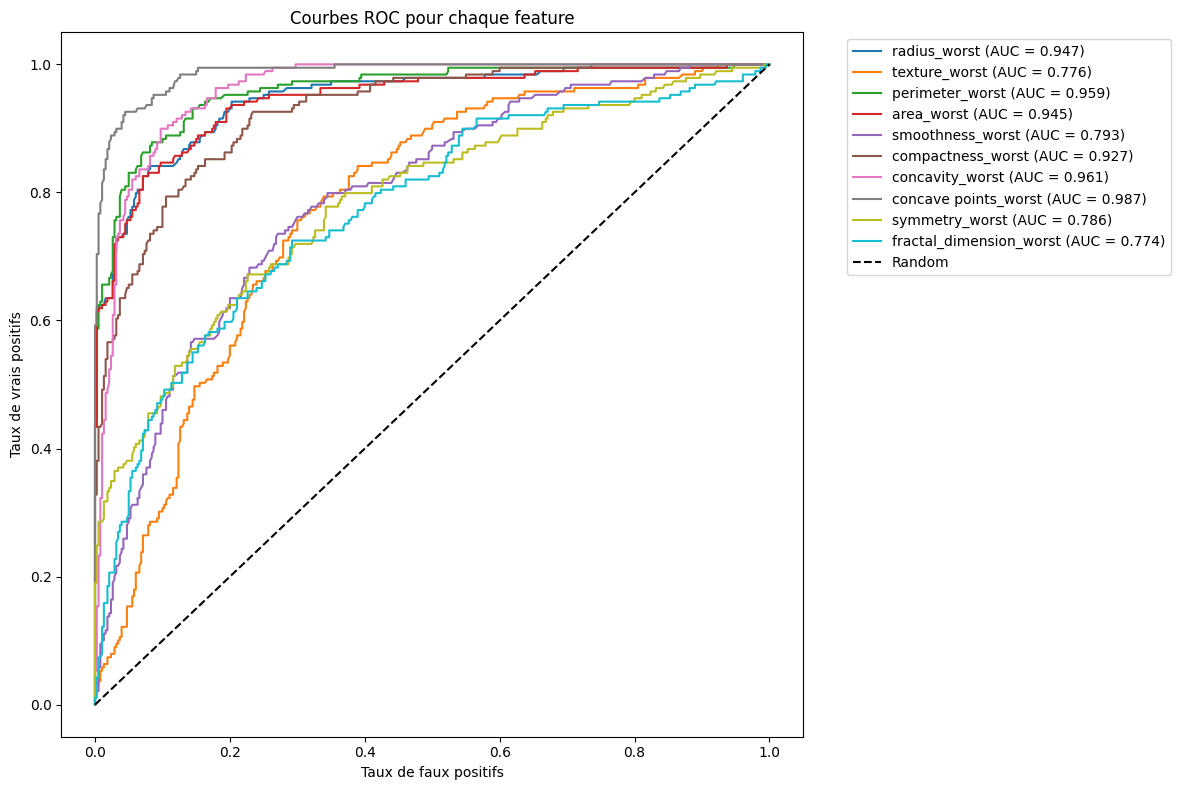


Classement des features par pouvoir discriminant (AUC):
concave points_worst: 0.9870
concavity_worst: 0.9610
perimeter_worst: 0.9594
radius_worst: 0.9471
area_worst: 0.9446
compactness_worst: 0.9270
smoothness_worst: 0.7929
symmetry_worst: 0.7860
texture_worst: 0.7765
fractal_dimension_worst: 0.7737


In [74]:
# Pour chaque feature, calculer l'AUC
auc_scores = {}

plt.figure(figsize=(12, 8))

for i, col in enumerate(worst_cols):
    # Calculer ROC pour cette feature
    fpr, tpr, thresholds = roc_curve(labels_worst, X_worst_scaled[:, i])
    auc = roc_auc_score(labels_worst, X_worst_scaled[:, i])
    auc_scores[col] = auc
    
    plt.plot(fpr, tpr, label=f'{col} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC pour chaque feature')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Afficher le classement des features par AUC
print("\nClassement des features par pouvoir discriminant (AUC):")
sorted_auc = sorted(auc_scores.items(), key=lambda x: abs(x[1] - 0.5), reverse=True)
for feature, auc in sorted_auc:
    print(f"{feature}: {auc:.4f}")

L'étude des boxplots, de l'ALD, de l'ACP ainsi que les courbes ROC nous informent que les features les plus discriminantes sont les suivantes :
- concave points
- concavity
- perimeter